In [140]:
# Estes Imports são padrões, numpy permite computação científica (usar matrizes e vetores eficientemente), 
# matplotlib permite plotar gráficos e sklearn permite usar o KNN (K-Nearest Neighbors)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
import seaborn as sns
from math import sqrt

random_state = 42 # Isso é para garantir que os resultados sejam os mesmos em todas as execuções, depois você vai entender melhor

In [141]:
# Aqui estou importando o dataset, ele é uma matriz de 150 linhas e 4 colunas, cada linha é uma flor e cada coluna é um atributo
iris = datasets.load_iris()
print(iris.data[:5]) # Aqui estou imprimindo o dataset, apenas as primeiras 5 flores. 
# Para entender como usar arrays em python, veja o link da documentação https://www.freecodecamp.org/news/list-within-a-list-in-python-initialize-a-nested-list/


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


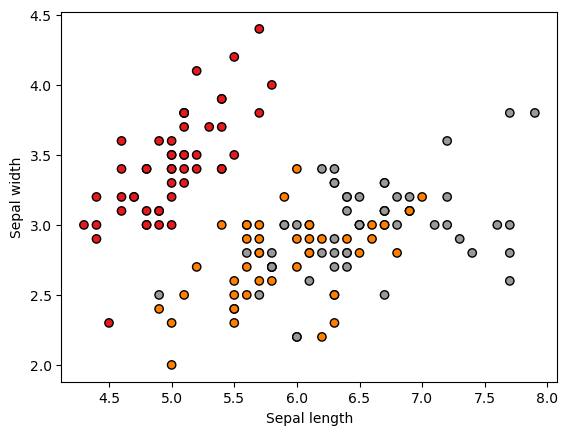

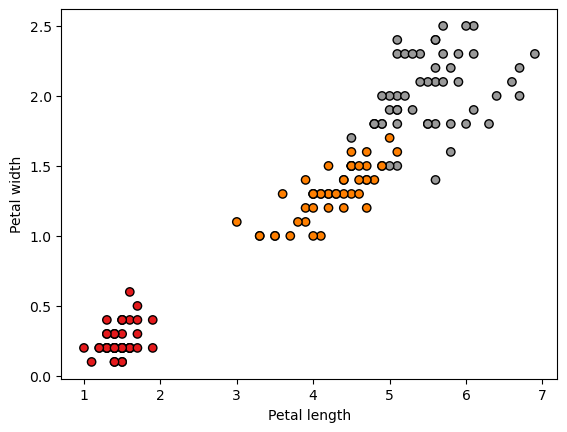

In [142]:
# Antes de prosseguir, é sempre bom entender o que estamos fazendo, então vamos plotar os dados

# Aqui estou os valores que vamos usar para classificar
X = iris.data
X_copy = X.copy() # Aqui estou fazendo uma cópia dos dados, pois vou usar eles depois
# Aqui estou pegando a classe de cada flor, que é o que queremos prever (são 3 classes)
y = iris.target
y_copy = y.copy() # Aqui estou fazendo uma cópia dos dados, pois vou usar eles depois

# Preciso embaralhar os dados, pois eles estão ordenados por classe, então se eu pegar os primeiros 100, vou ter apenas 2 classes
# e o KNN não vai funcionar bem
np.random.seed(random_state)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Aqui estou plotando os dados das sépalas, cada cor representa uma classe (0, 1 ou 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Aqui estou plotando os dados das pétalas, cada cor representa uma classe (0, 1 ou 2)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# Vale notar que os dados das pétalas são mais separáveis do que os dados das sépalas, isso é importante para o KNN,
# pois ele usa a distância entre os pontos para classificar, então quanto mais separados os dados, melhor
# Vamos usar primeiramente só os dados das pétalas para classificar, depois vamos usar todos os dados para avaliar qual é melhor

X = X[:, 2:] # Aqui estou pegando apenas as duas últimas colunas, que são os dados das pétalas


<Axes: >

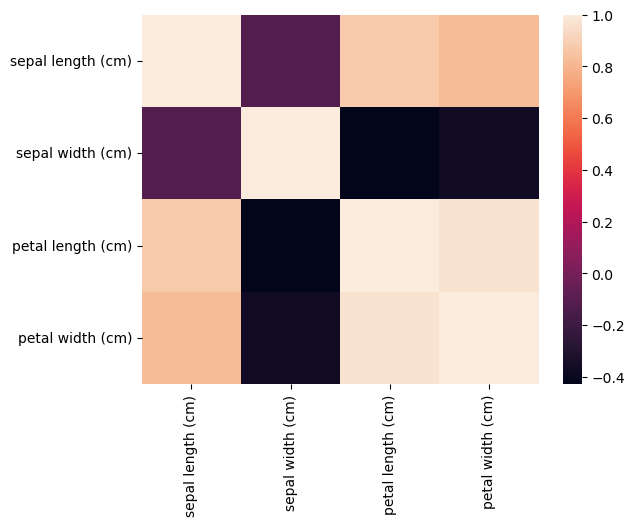

In [143]:
# Existe uma técnica que é entender a matriz de correlações, ela mostra como os dados estão correlacionados,
# quanto mais próximo de 1, mais correlacionados, quanto mais próximo de 0, menos correlacionados
# Isso é importante para entender quais dados são mais importantes para classificar
# Vale notar que essa técnica é mais usada quando temos muitos atributos, pois é muito difícil visualizar os dados
# Vamos usar ela aqui para entender melhor os dados
# Aqui estou pegando a correlação entre os dados das pétalas
correlation_matrix = np.corrcoef(iris.data.T)
sns.heatmap(correlation_matrix, xticklabels=iris.feature_names, yticklabels=iris.feature_names)

In [144]:
# Antes de usar o KNN, precisamos separar o dataset em treino e teste. (precisamos de descobrir alguns parâmetros do algoritmo e depois testar se ele funciona bem)
# Em machine learning, nunca sabemos se um algoritmo aprendeu bem e consegue generalizar para novos dados, por isso precisamos de testar com dados que o algoritmo nunca viu.
# Vamos usar 80% para treino e 20% para teste.

# Aqui estou a separar os dados em treino e teste, 80% para treino e 20% para teste (existe uma função do sklearn que faz isso, mas vamos fazer manualmente para entender melhor)
train_data, train_target = X[:120], y[:120]
test_data, test_target = X[120:], y[120:]


In [145]:
# Agora vamos usar o KNN para classificar as flores.
# Para isso, já sabemos de antemão que existem 3 classes, então vamos usar 3 vizinhos para classificar.
# O KNN neste caso é um classificador supervisionado, pois ele usa os dados de treino para aprender a classificar

# Para fazer a predição, ele faz do seguinte modo:
# 1 - Calcular a distância entre o ponto que queremos classificar e todos os pontos de treino
# 2 - Pegar os K vizinhos mais próximos
# 3 - Ver qual é a classe que tem mais vizinhos próximos
# 4 - Classificar o ponto com a classe que tem mais vizinhos próximos

# Aqui estou criando o classificador, usando 3 vizinhos e a distância euclidiana (que é a distância normal que aprendemos na escola)
# A distância é a forma que ele usa para classificar, ele vai ver os 3 vizinhos mais próximos e ver qual é a classe deles, a classe que tiver mais vizinhos próximos é a classe que ele vai classificar.
clf = neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# Aqui estou treinando o classificador, ele vai aprender a classificar as flores
clf.fit(train_data, train_target)
# Aqui estou usando o classificador para classificar as flores de teste
predicted = clf.predict(test_data)
# Aqui estou imprimindo a classe real e a classe prevista pelo classificador
print('Real: ', test_target)
print('Predicted: ', predicted)
# Aqui estou imprimindo a acurácia do classificador, que é a porcentagem de acertos
print('Accuracy: ', np.mean(predicted == test_target))
# A acurácia foi BEM alta, mas isso não quer dizer que o classificador é bom, pois o dataset é pequeno e simples, então é fácil de classificar.




Real:  [1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
Predicted:  [1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 1 0 1 2]
Accuracy:  0.9666666666666667


In [146]:
# Vamos testar com o dataset inteiro agora, para ver se a acurácia continua alta.

X = iris.data # Aqui estou voltando para o dataset original, com 4 atributos
y = iris.target # Como embaralhei os dados, preciso voltar para o dataset original também

# Estou fazendo a separação de treino e teste novamente, mas agora com o dataset inteiro
train_data, train_target = X[:120], y[:120]
test_data, test_target = X[120:], y[120:]

# Preciso embaralhar os dados novamente
np.random.seed(random_state)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Aqui estou criando o classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# Aqui estou treinando o classificador
clf.fit(train_data, train_target)
# Aqui estou usando o classificador para classificar as flores de teste
predicted = clf.predict(test_data)
# Aqui estou imprimindo a classe real e a classe prevista pelo classificador
print('Real: ', test_target)
print('Predicted: ', predicted)
# Aqui estou imprimindo a acurácia do classificador, que é a porcentagem de acertos
print('Accuracy: ', np.mean(predicted == test_target))
# Olha que interessante, a acurácia caiu bastante.
# Um motivo é que o tamanho das pétalas é mais importante para classificar as flores do que o tamanho das sépalas, então quando usamos apenas os dados das pétalas, a acurácia foi maior.
# Isso mostra que nem sempre mais dados é melhor, temos que saber quais dados são mais importantes para classificar.
# Depois vou usar o PCA para reduzir a dimensionalidade dos dados e ver se a acurácia melhora, mas deixemos isto para depois.

Real:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted:  [2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1]
Accuracy:  0.7666666666666667


In [147]:
# Esta é a implementação do KNN, para entender melhor como ele funciona
# Ela não está otimizada, podem ter variações de tempo de execução, mas é apenas para entender como ele funciona

# Esta é a função de cálculo da distância euclidiana
def euclidean_distance(row1, row2):
	distance = 0.0
	# Aqui medimos a distância de dois pontos para o espaço de 4 dimensões (2 sépalas e 2 pétalas)
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

# Esta é a função que retorna os vizinhos mais próximos, ela obriga o algoritmo a saber quantos vizinhos ele deve usar para classificar (comparar as classes),
# No sklearn, ele fez isto para nós (usa por padrão 5 vizinhos), mas aqui vamos fazer manualmente
def get_neighbors(train, classification, test_row, num_neighbors):
	distances = list()
	# Isto serve para ele calcular a distância entre o ponto que queremos classificar e todos os pontos de treino
	for i, train_row in enumerate(train):
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist, classification[i]))
	# Aqui ele ordena as distâncias, para pegar os vizinhos mais próximos (no caso 3)
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		# Estou colocando as classificações 
		neighbors.append(distances[i][2])
	return neighbors

# Esta é a função que classifica o ponto, ela pega os vizinhos mais próximos e vê qual é a classe que tem mais vizinhos próximos
def predict_classification(train, classification, test_row, num_neighbors):
	neighbors = get_neighbors(train, classification, test_row, num_neighbors)
	neighbors = list(neighbors)
	# Aqui ele pega a classe que tem mais vizinhos próximos
	prediction = max(set(neighbors), key=neighbors.count)
	return prediction

# Esta é a função que classifica todos os pontos de teste
def k_nearest_neighbors(train, classification, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, classification, row, num_neighbors)
		predictions.append(output)
	return(predictions)

# Vamos testar nostas funçÕes com o dataset inteiro
X = iris.data
y = iris.target

# Preciso embaralhar os dados novamente
np.random.seed(random_state)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Aqui estou fazendo a separação de treino e teste novamente, mas agora com o dataset inteiro
train_data, train_target = X[:120], y[:120]
test_data, test_target = X[120:], y[120:]

# Aqui estou usando as funções que implementamos para classificar as flores
predicted = k_nearest_neighbors(train_data, y, test_data, 3)
# Aqui estou imprimindo a classe real e a classe prevista pelo classificador
print('Real: ', test_target)
print('Predicted: ', predicted)
# Aqui estou imprimindo a acurácia do classificador, que é a porcentagem de acertos
print('Accuracy: ', np.mean(predicted == test_target))
# É exatamente igua ao do sklearn!




Real:  [1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
Predicted:  [1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2]
Accuracy:  0.9666666666666667


In [148]:
# Vamos aproveitar e testar com o dataset de câncer de mama, para ver se o KNN funciona bem com dados mais complexos

# Aqui estou importando o dataset, ele é uma matriz de 569 linhas e 30 colunas, cada linha é uma célula e cada coluna é um atributo
cancer = datasets.load_breast_cancer()

# Antes de prosseguir, é sempre bom entender o que estamos fazendo, então vamos plotar os dados

# Aqui estou os valores que vamos usar para classificar
X = cancer.data
y = cancer.target

# Vamos embaralhar os dados com uma função do sklearn desta vez
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=random_state)

# Vamos separar os dados com uma função do sklearn também
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=random_state)

# E vamos testar
clf = neighbors.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf.fit(train_data, train_target)
predicted = clf.predict(test_data)
print('Real: ', test_target)
print('Predicted: ', predicted)
print('Accuracy SKLEARN: ', np.mean(predicted == test_target))
# A acuácia é menor que o do dataset das flores, mas ainda é alta, então o KNN funciona bem com dados mais complexos também.
# Vamos testar com as funções que implementamos
predicted = k_nearest_neighbors(train_data, train_target, test_data, 3)
print('Real: ', test_target)
print('Predicted: ', predicted)
print('Accuracy HENRIQUE: ', np.mean(predicted == test_target))
# Identica ao do sklearn! Apenas mais lenta...


Real:  [0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 1]
Predicted:  [0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 0 1]
Accuracy SKLEARN:  0.8771929824561403
Real:  [0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1
 1 1 1]
Predicted:  [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,